In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Part 2: Exploratory Data Analysis
Using your scraped data, investigates different relationships between candidates and the amount of money they raised. Here are some suggestions to get you started, but feel free to pose you own questions or do additional exploration:  
    a. How often does the candidate who raised more money win a race?  
    b. How often does the candidate who spent more money win a race?  
    c. Does the difference between either money raised or money spent seem to influence the likelihood of a candidate winning a race?  
    d. How often does the incumbent candidate win a race?  
    e. Can you detect any relationship between amount of money raised and the incumbent status of a candidate?

In [2]:
#reading in the csv that was created.
House_of_Rep = pd.read_csv('../data/HOR_2020.CSV')
House_of_Rep

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining
0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973
1,James Averhart,(D),Alabama,District 01,False,False,35.0,80095,78973,1122
2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633
3,Phyllis Harvey-Hall,(D),Alabama,District 02,False,False,34.6,56050,55988,0
4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234
...,...,...,...,...,...,...,...,...,...,...
877,Tricia Zunker,(D),Wisconsin,District 07,False,False,39.2,1261957,1232690,29267
878,Mike Gallagher,(R),Wisconsin,District 08,True,True,64.0,3202905,2841801,1169362
879,Amanda Stuck,(D),Wisconsin,District 08,False,False,36.0,416978,399916,2165
880,Liz Cheney,(R),Wyoming,District 01,True,True,68.6,3003883,3060167,153567


a. How often does the candidate who raised more money win a race?

In [4]:
#All the candidates that won their race
House_of_Rep[House_of_Rep['Winner']==True]

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining
0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973
2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633
4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234
6,Robert B Aderholt,(R),Alabama,District 04,True,True,82.5,1255076,1323812,647004
7,Mo Brooks,(R),Alabama,District 05,True,True,95.8,655365,210045,1137501
...,...,...,...,...,...,...,...,...,...,...
872,Scott Fitzgerald,(R),Wisconsin,District 05,False,True,60.2,1155721,968406,187315
874,Glenn Grothman,(R),Wisconsin,District 06,True,True,59.3,1815756,1736659,269431
876,Tom Tiffany,(R),Wisconsin,District 07,True,True,60.8,2637459,2514740,122719
878,Mike Gallagher,(R),Wisconsin,District 08,True,True,64.0,3202905,2841801,1169362


In [6]:
#The candidate who raised the most in their district race
House_of_Rep['Raised Ranked'] = House_of_Rep.groupby(['State','District'])['Raised'].rank(ascending = False)
House_of_Rep

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked
0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973,1.0
1,James Averhart,(D),Alabama,District 01,False,False,35.0,80095,78973,1122,2.0
2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633,1.0
3,Phyllis Harvey-Hall,(D),Alabama,District 02,False,False,34.6,56050,55988,0,2.0
4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234,1.0
...,...,...,...,...,...,...,...,...,...,...,...
877,Tricia Zunker,(D),Wisconsin,District 07,False,False,39.2,1261957,1232690,29267,2.0
878,Mike Gallagher,(R),Wisconsin,District 08,True,True,64.0,3202905,2841801,1169362,1.0
879,Amanda Stuck,(D),Wisconsin,District 08,False,False,36.0,416978,399916,2165,2.0
880,Liz Cheney,(R),Wyoming,District 01,True,True,68.6,3003883,3060167,153567,1.0


In [7]:
#Creating a column that seperating those who raised the most from those who did not using True or False.
House_of_Rep['Top Raised'] = np.where(House_of_Rep['Raised Ranked'] == 1.0, True, False)
House_of_Rep

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked,Top Raised
0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973,1.0,True
1,James Averhart,(D),Alabama,District 01,False,False,35.0,80095,78973,1122,2.0,False
2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633,1.0,True
3,Phyllis Harvey-Hall,(D),Alabama,District 02,False,False,34.6,56050,55988,0,2.0,False
4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
877,Tricia Zunker,(D),Wisconsin,District 07,False,False,39.2,1261957,1232690,29267,2.0,False
878,Mike Gallagher,(R),Wisconsin,District 08,True,True,64.0,3202905,2841801,1169362,1.0,True
879,Amanda Stuck,(D),Wisconsin,District 08,False,False,36.0,416978,399916,2165,2.0,False
880,Liz Cheney,(R),Wyoming,District 01,True,True,68.6,3003883,3060167,153567,1.0,True


In [9]:
#Crosstabe shows how often the candidate who raised the most, also won their race.
CrosstabResult = pd.crosstab(index=House_of_Rep['Top Raised'], columns= House_of_Rep['Winner'])
CrosstabResult

Winner,False,True
Top Raised,,
False,402,47
True,51,382


In [10]:
#The number of candidate that raised the most and won their race divided by the total number of races.
382/433

0.8822170900692841

**88% of the time, the candidate that raised the most money is the candidate that wins the race.**

b. How often does the candidate who spent more money win a race?

In [11]:
#Creating a column that shows the candidates that spent the most with 1.
House_of_Rep['Spent Ranked'] = House_of_Rep.groupby(['State','District'])['Spent'].rank(ascending = False)

In [13]:
#A column that seperates the candidates that spent the most with True and the others with False
House_of_Rep['Top Spent'] = np.where(House_of_Rep['Spent Ranked'] == 1.0, True, False)
House_of_Rep

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked,Top Raised,Spent Ranked,Top Spent
0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973,1.0,True,1.0,True
1,James Averhart,(D),Alabama,District 01,False,False,35.0,80095,78973,1122,2.0,False,2.0,False
2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633,1.0,True,1.0,True
3,Phyllis Harvey-Hall,(D),Alabama,District 02,False,False,34.6,56050,55988,0,2.0,False,2.0,False
4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234,1.0,True,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,Tricia Zunker,(D),Wisconsin,District 07,False,False,39.2,1261957,1232690,29267,2.0,False,2.0,False
878,Mike Gallagher,(R),Wisconsin,District 08,True,True,64.0,3202905,2841801,1169362,1.0,True,1.0,True
879,Amanda Stuck,(D),Wisconsin,District 08,False,False,36.0,416978,399916,2165,2.0,False,2.0,False
880,Liz Cheney,(R),Wyoming,District 01,True,True,68.6,3003883,3060167,153567,1.0,True,1.0,True


In [14]:
#Crosstabe shows how often the candidate that spent the most were the winners of their race.
raised_winner_crosstab = pd.crosstab(index=House_of_Rep['Top Spent'], columns= House_of_Rep['Winner'])
raised_winner_crosstab

Winner,False,True
Top Spent,,
False,399,50
True,54,379


In [15]:
#The total amount of candidates that spent the most during their race divided by the total amount of races.
379/433

0.8752886836027713

**87% of the time the candidate that spent the most has one the race**

c. Does the difference between either money raised or money spent seem to influence the likelihood of a candidate winning a race?


In [32]:
House_of_Rep.head(5)

,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked,Top Raised,Spent Ranked,Top Spent
0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973,1.0,True,1.0,True
1,James Averhart,(D),Alabama,District 01,False,False,35.0,80095,78973,1122,2.0,False,2.0,False
2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633,1.0,True,1.0,True
3,Phyllis Harvey-Hall,(D),Alabama,District 02,False,False,34.6,56050,55988,0,2.0,False,2.0,False
4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234,1.0,True,1.0,True


In [16]:
House_of_Rep['Raised'] - House_of_Rep['Spent']

0      111972
1        1122
2      -18561
3          62
4      -25453
        ...  
877     29267
878    361104
879     17062
880    -56284
881      2362
Length: 882, dtype: int64

d. How often does the incumbent candidate win a race?

In [17]:
#Crosstab shows how often an Incumbent wins their race.
Incumbent_winner_crosstab = pd.crosstab(index=House_of_Rep['Incumbent'], columns= House_of_Rep['Winner'])
Incumbent_winner_crosstab

Winner,False,True
Incumbent,,
False,438,59
True,15,370


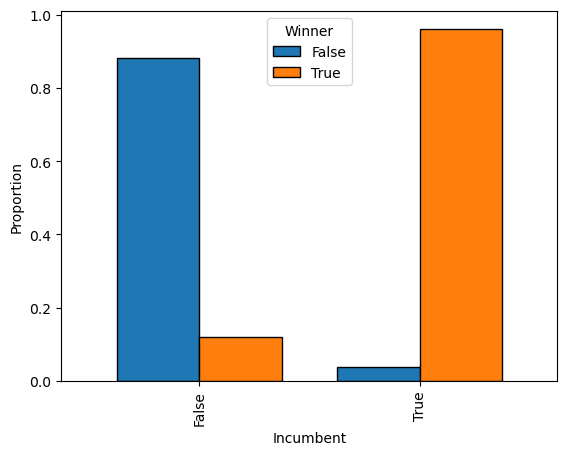

In [87]:
pd.crosstab(index = House_of_Rep['Incumbent'],
            columns = House_of_Rep['Winner'],
           normalize = 'index').plot(kind = 'bar', 
                                    edgecolor = 'black', 
                                    width = 0.75);
plt.ylabel('Proportion');

In [18]:
#The number of Incumbents that won their race divided by the total amount races where an incumbent was a candidate.
370/385

0.961038961038961

96% of the time where an incumbent was present in the race they were the winner.

e. Can you detect any relationship between amount of money raised and the incumbent status of a candidate?

In [19]:
House_of_Rep[['Incumbent', 'Raised']].corr()

,Incumbent,Raised
Incumbent,1.000000,0.271196
Raised,0.271196,1.000000


**MY EDA**

In [45]:
House_of_Rep['Party'].unique()

array(['(R)', '(D)', '(I)', '(3)', '(L)'], dtype=object)

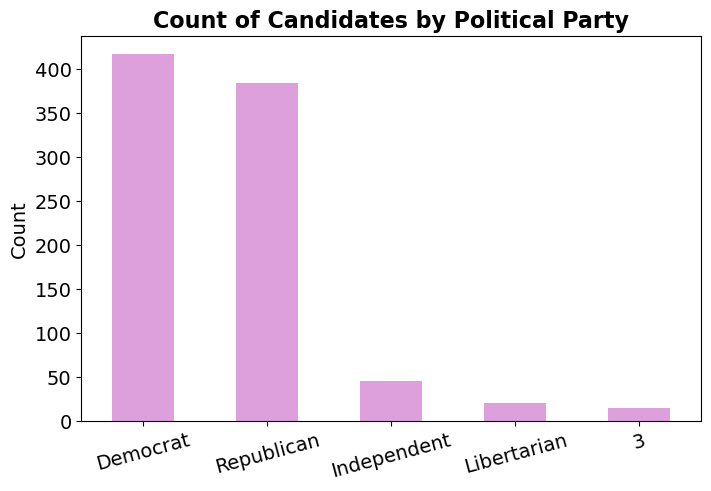

In [57]:
#The amount of candidates for each party
plt.figure(figsize = (8,5))
House_of_Rep['Party'].value_counts().plot(kind = 'bar', color = 'plum')
plt.xticks(rotation = 15, fontsize = 14, labels = ['Democrat', 'Republican', 'Independent', 'Libertarian', '3'], ticks = [0, 1, 2, 3, 4])
plt.yticks(fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Count of Candidates by Political Party', fontsize = 16, fontweight = 'bold');

In [69]:
#How much the winner spent on their campaign
House_of_Rep_Winners.groupby(['State', 'District'])['Spent'].sum().sort_values(ascending = False).reset_index()

,State,District,Spent
0,Louisiana,District 01,32830607
1,California,District 23,24265583
2,California,District 12,22064953
3,California,District 22,20156093
4,Texas,District 02,17596329
...,...,...,...
424,Maine,District 01,264790
425,California,District 32,251047
426,Alabama,District 05,210045
427,Indiana,District 04,190158


In [72]:
#Most expensive campaign to the least expensive
House_of_Rep.sort_values('Spent', ascending = False).reset_index()

,index,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked,Top Raised,Spent Ranked,Top Spent
0,342,Steve Scalise,(R),Louisiana,District 01,True,True,72.2,37262827,32830607,6217720,1.0,True,1.0,True
1,79,Kevin McCarthy,(R),California,District 23,True,True,62.1,27780644,24265583,4802133,1.0,True,1.0,True
2,59,Nancy Pelosi,(D),California,District 12,True,True,77.6,27359508,22064953,6299373,1.0,True,1.0,True
3,77,Devin Nunes,(R),California,District 22,True,True,54.2,26825212,20156093,10908033,1.0,True,1.0,True
4,720,Dan Crenshaw,(R),Texas,District 02,True,True,55.6,19427865,17596329,1852715,1.0,True,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,711,Ronald Brown,(I),Tennessee,District 07,False,False,2.2,1750,0,9006,3.0,False,4.0,False
878,363,Mia Mason,(D),Maryland,District 01,False,False,36.3,2524,0,0,2.0,False,2.0,False
879,465,Mark Elworth Jr,(D),Nebraska,District 03,False,False,17.7,255,0,255,2.0,False,2.0,False
880,519,Amit Lal,(I),New York,District 05,False,False,NaN,126,0,126,2.0,False,2.0,False


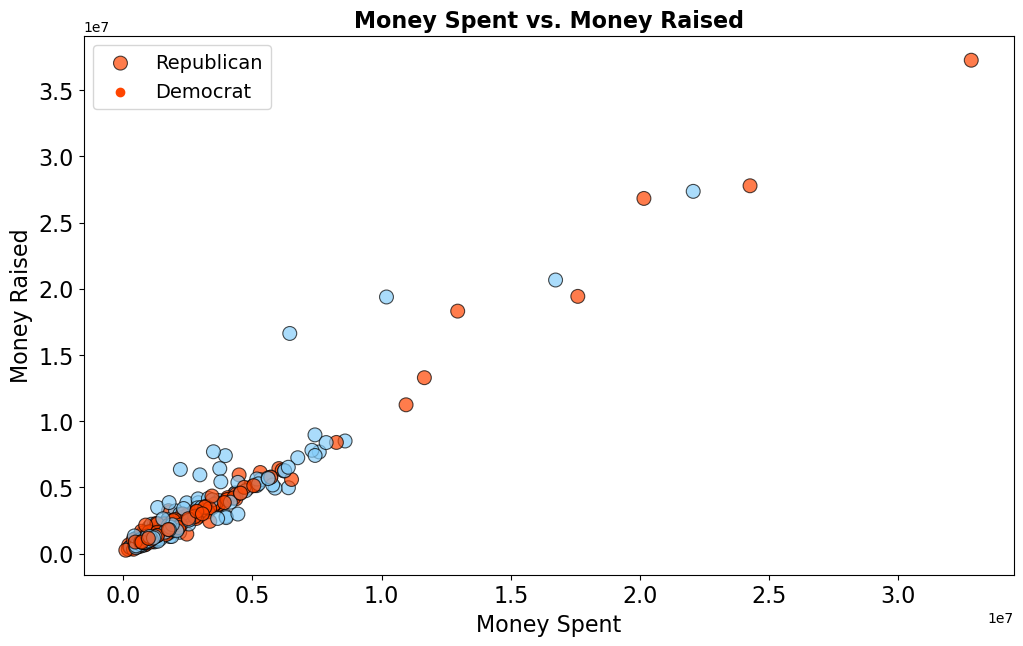

In [83]:
fontsize = 16

plt.figure(figsize = (12,7))
sns.scatterplot(data = House_of_Rep_Winners, x = 'Spent', y = 'Raised', s = 100,
                hue = 'Party', palette = ['orangered', 'lightskyblue'],
                alpha = 0.7, edgecolor = 'black')
plt.xticks(fontsize = fontsize)
plt.xlabel('Money Spent', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Money Raised', fontsize = fontsize)
plt.title('Money Spent vs. Money Raised', fontsize = fontsize, fontweight = 'bold')
plt.legend(fontsize = fontsize - 2, labels = ['Republican', 'Democrat']);

In [23]:
District_Average_Raised = House_of_Rep.groupby(['State', 'District'])['Raised'].mean().reset_index()
District_Average_Raised

,State,District,Raised
0,Alabama,District 01,1025708.0
1,Alabama,District 02,353428.5
2,Alabama,District 03,621692.0
3,Alabama,District 04,1255076.0
4,Alabama,District 05,655365.0
...,...,...,...
428,Wisconsin,District 05,763056.5
429,Wisconsin,District 06,1051754.5
430,Wisconsin,District 07,1949708.0
431,Wisconsin,District 08,1809941.5


In [24]:
House_of_Rep_Winners = House_of_Rep[House_of_Rep['Winner']== True].reset_index()
House_of_Rep_Winners

,index,Candidate,Party,State,District,Incumbent,Winner,Percentage of Vote,Raised,Spent,Funds Remaining,Raised Ranked,Top Raised,Spent Ranked,Top Spent
0,0,Jerry Carl,(R),Alabama,District 01,False,True,64.9,1971321,1859349,111973,1.0,True,1.0,True
1,2,Barry Moore,(R),Alabama,District 02,False,True,65.3,650807,669368,-13633,1.0,True,1.0,True
2,4,Mike D Rogers,(R),Alabama,District 03,True,True,67.5,1193111,1218564,502234,1.0,True,1.0,True
3,6,Robert B Aderholt,(R),Alabama,District 04,True,True,82.5,1255076,1323812,647004,1.0,True,1.0,True
4,7,Mo Brooks,(R),Alabama,District 05,True,True,95.8,655365,210045,1137501,1.0,True,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,872,Scott Fitzgerald,(R),Wisconsin,District 05,False,True,60.2,1155721,968406,187315,1.0,True,1.0,True
425,874,Glenn Grothman,(R),Wisconsin,District 06,True,True,59.3,1815756,1736659,269431,1.0,True,1.0,True
426,876,Tom Tiffany,(R),Wisconsin,District 07,True,True,60.8,2637459,2514740,122719,1.0,True,1.0,True
427,878,Mike Gallagher,(R),Wisconsin,District 08,True,True,64.0,3202905,2841801,1169362,1.0,True,1.0,True


In [34]:
House_of_Rep_Losers = House_of_Rep[House_of_Rep['Winner'] == False].reset_index()

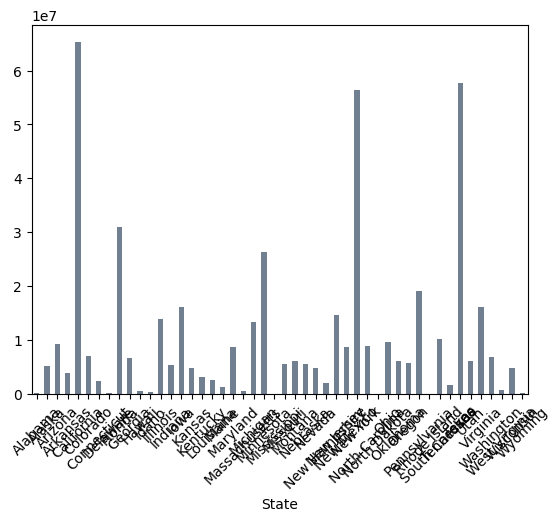

In [41]:
House_of_Rep_Losers.groupby(['State'])['Raised'].sum().plot(kind = 'bar', color = 'slategray')


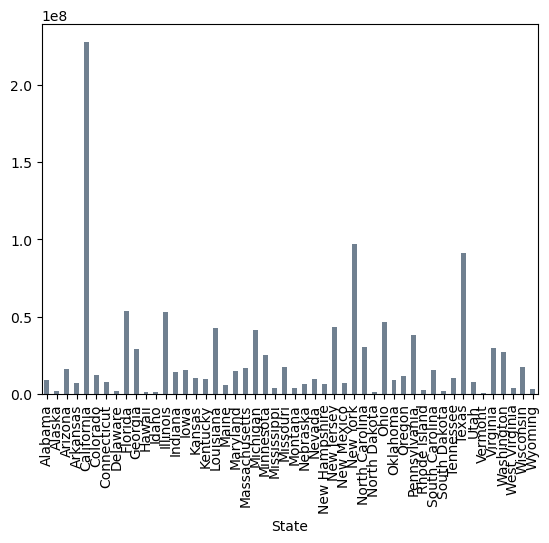

In [40]:
House_of_Rep_Winners.groupby(['State'])['Raised'].sum().plot(kind = 'bar', color = 'slategray')


In [25]:
House_of_Rep_Winners[['Candidate','State', 'District', 'Winner', 'Raised']]

,Candidate,State,District,Winner,Raised
0,Jerry Carl,Alabama,District 01,True,1971321
1,Barry Moore,Alabama,District 02,True,650807
2,Mike D Rogers,Alabama,District 03,True,1193111
3,Robert B Aderholt,Alabama,District 04,True,1255076
4,Mo Brooks,Alabama,District 05,True,655365
...,...,...,...,...,...
424,Scott Fitzgerald,Wisconsin,District 05,True,1155721
425,Glenn Grothman,Wisconsin,District 06,True,1815756
426,Tom Tiffany,Wisconsin,District 07,True,2637459
427,Mike Gallagher,Wisconsin,District 08,True,3202905


In [26]:
District_Total_Raised = House_of_Rep.groupby(['State', 'District'])['Raised'].sum().reset_index()
District_Total_Raised

,State,District,Raised
0,Alabama,District 01,2051416
1,Alabama,District 02,706857
2,Alabama,District 03,1243384
3,Alabama,District 04,1255076
4,Alabama,District 05,655365
...,...,...,...
428,Wisconsin,District 05,1526113
429,Wisconsin,District 06,2103509
430,Wisconsin,District 07,3899416
431,Wisconsin,District 08,3619883


In [27]:
#The amount raised by the winners divided by the total amount raised in their district. 
District_Total_Raised['Winning Proportion'] = (House_of_Rep_Winners['Raised'])/(District_Total_Raised['Raised'])
District_Total_Raised

,State,District,Raised,Winning Proportion
0,Alabama,District 01,2051416,0.960956
1,Alabama,District 02,706857,0.920705
2,Alabama,District 03,1243384,0.959568
3,Alabama,District 04,1255076,1.000000
4,Alabama,District 05,655365,1.000000
...,...,...,...,...
428,Wisconsin,District 05,1526113,1.968323
429,Wisconsin,District 06,2103509,NaN
430,Wisconsin,District 07,3899416,NaN
431,Wisconsin,District 08,3619883,NaN


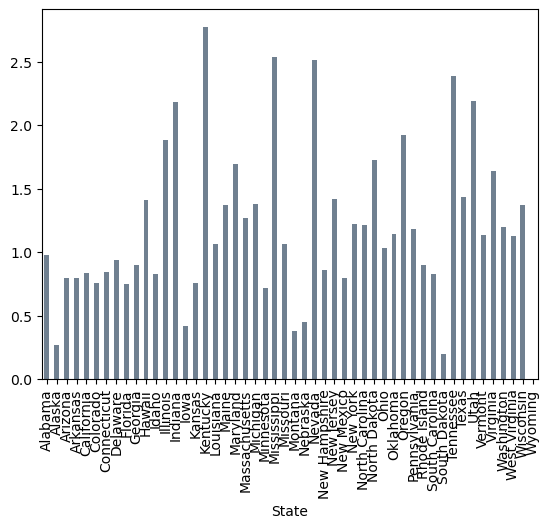

In [30]:
District_Total_Raised.groupby(['State'])['Winning Proportion'].mean().plot(kind = 'bar', color = 'slategray');